![Airbnb](https://raw.githubusercontent.com/interviewquery/takehomes/airbnb_1/airbnb_1/logo.png)

# TAKE-HOME CHALLENGE: Data Science - Analytics

Airbnb is a two-sided marketplace that matches guests to hosts. The
booking flow at Airbnb is as follows: a guest finds an available room
(listing) that they like, and then they contact the host. Once the guest
finds a listing they are interested in, there are three ways to send the
host an inquiry: `contact_me`, `book_it`, or `instant_book` (detailed at
the bottom of this document). Upon receiving the inquiry, the host can
then decide whether or not to accept the request (for `contact_me` and
`book_it` methods; `instant_book` is auto-accepted). One of our
goals at Airbnb is to increase bookings on our platform.

## Prompt

You are the first data scientist to join a cross-functional Product and
Operations team working to grow bookings in Rio de Janeiro. The team
asks you for help with the following:

1.  What key metrics would you propose to monitor over time the success
    of the team's efforts in improving the guest host matching process
    and why? Clearly define your metric(s) and explain how each is
    computed.

2.  What areas should we invest in to increase the number of successful
    bookings in Rio de Janeiro? What segments are doing well and what
    could be improved? ​ ​Propose 2-3 specific recommendations (business
    initiatives and product changes) that could address these
    opportunities. Demonstrate rationale behind each recommendation AND
    prioritize your recommendations in order of their estimated impact.

3.  There is also interest from executives at Airbnb in the work you
    are doing, and a desire to understand the broader framing of the
    challenge of matching supply and demand, thinking beyond the data
    provided. What other research, experiments, or approaches could help
    the company get more clarity on the problem?

## Assignment
S​ummarize your recommendations in response to the questions above in a Jupyter Notebook intended for
the Head of Product and VP of Operations (who is not technical). Include
an organized appendix sharing the details of your work conducted for the
Rio team, that would be useful for the data team to understand your
work.






## Grading

Your assignment will be judged according to:

1.  The analytical approach and clarity of your graphs, tables,
    visualizations,

2.  The data decisions you made and reproducibility of the analysis,

3.  Strength of recommendations, prioritizations, and rationale behind
    those,

4.  The narrative of your presentation and ability to effectively
    communicate to non-technical executives, 5) How well you followed
    the directions.

## Data Provided

### `contacts.csv`​​
Contains a row for every time that a user makes an
inquiry for a stay at a listing in Rio de Janeiro.

-   `id_guest_anon` -​ id of the guest making the inquiry.

-   `id_host_anon` -​ id of the host of the listing to which the inquiry is
    made.

-   `id_listing_anon` -​ id of the listing to which the inquiry is made.

-   `ts_interaction_first` -​ UTC timestamp of the moment the inquiry is
    made.

-   `ts_reply_at_first` -​ UTC timestamp of the moment the host replies to
    the inquiry, if so.
- `ts_accepted_at_first` - UTC timestamp of the
    moment the host accepts the inquiry, if so.​
    
-    `ts_booking_at` - UTC
    timestamp of the moment the booking is made, if so.

-   `ds_checkin_first` -​ Date stamp of the check-in date of the inquiry.

-   `ds_checkout_first` ​- Date stamp of the check-out date of the inquiry.

-   `m_guests` ​- The number of guests the inquiry is for.

-   `m_interactions` -​ The total number of messages sent by both the guest
    and host.

-   `m_first_message_length_in_characters` -​ Number of characters in the
    first message sent by the guest, if a message was sent

-   `contact_channel_first` -​ The contact channel through which the
    inquiry was made. One of {contact_me, book_it, instant_book}. \*See
    bottom of page for more detail\*

-   `guest_user_stage_first` ​- Indicates whether the user has made a
    booking before sending the inquiry ("past booker"). If the user has
    not booked before, then the user is a new user.

### `listings.csv`
Contains data for every listing in the market

-   `id_listing_anon` ​- anonymized id of the listing

-   `room_type` -​ indicates whether the room is an entire home, private
    room, or shared room

-   `listing_neighborhood` -​ the neighborhood of the listing

-   `total_reviews` -​ the total number of reviews of the listing (at the
    time the data was pulled).

### Users
Contains data for every user

-   `id_user_anon` ​- anonymized id of user

-   `words_in_user_profile` - the number of words in the "about me"
    section of the user's Airbnb profile (at the time of contact)

-   `country` -​ origin country of the user

## Further Information

There are three ways to book a listing on Airbnb:

1)  `contact_me` -​ The guests writes a message to the host to inquire
    about the listing. The host has the option to 1) pre-​approve the
    guest to book their place, or 2) they can reject, or 3) they can
    write a free text message with no explicit acceptance or rejection.
    If the host pre-​approves, the guest can then go ahead and click to
    make the booking (but is not obligated to).

2)  `book_it` ​- The guest puts money down to book the place directly,
    but the host has to accept the reservation request. If the host
    accepts, the booking happens automatically. If you have used Airbnb
    before, this shows up as a button labeled "Request to book".

3)  `instant_book`​ -​ The guest books the listing directly, without any
    need for the host to accept or reject actively (it is auto​-accepted
    by the host). This shows up as a button labeled "Book".

### Note​
A host can opt-in to the `instant_book` feature. If a host
does so, a guest can use the `contact_me` or `instant_book` channels
for booking that particular listing, but cannot use the `book_it`
functionality. Alternatively, if a host does not opt in, a guest can use
the `contact_me` or `book_it` channels only. We suggest that you
browse the Airbnb website and look at listings to see the different ways
that you can message a host.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!git clone --branch airbnb_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/airbnb_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (1968/1968), done.
remote: Compressing objects: 100% (1222/1222), done.
remote: Total 1968 (delta 755), reused 1933 (delta 729), pack-reused 0 (from 0)
Receiving objects: 100% (1968/1968), 299.41 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (755/755), done.
/content/takehomes/airbnb_1
contacts.csv  file.json  listings.csv  logo.png  takehomefile.ipynb  users.csv


In [7]:
import requests
import pandas as pd
import numpy as np


In [ ]:
file_paths = ["/content/takehomes/airbnb_1/contacts.csv",
              "/content/takehomes/airbnb_1/listings.csv",
              "/content/takehomes/airbnb_1/users.csv"
]

for file in file_paths:
    df = pd.read_csv(file)
    print(f"Contents of {file}:\n", df.head())


In [10]:
contacts_df = pd.read_csv(file_paths[0])
listings_df = pd.read_csv(file_paths[1])
users_df = pd.read_csv(file_paths[2])


In [11]:
contacts_df.dropna(subset=["ts_reply_at_first", "ts_accepted_at_first", "ts_booking_at"], axis=0, inplace=True)

listings_df.dropna(subset=["room_type", "listing_neighborhood", "total_reviews"], axis=0, inplace=True)

users_df.dropna(subset=["words_in_user_profile", "country"], axis=0, inplace=True)


for df in [contacts_df, listings_df, users_df]:
    df.reset_index(drop=True, inplace=True)




Text(0.5, 1.0, 'Distribution of m_interactions')

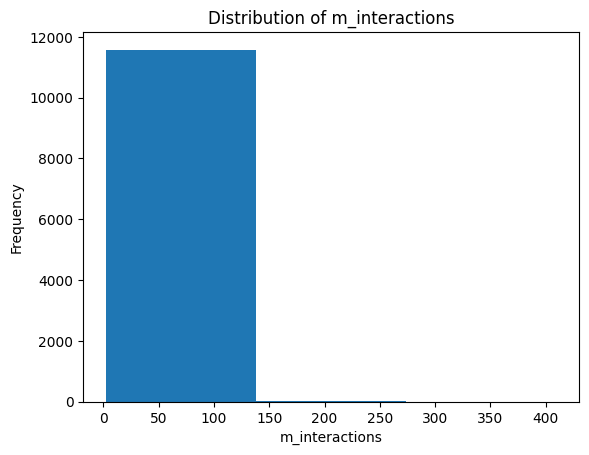

In [12]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(contacts_df["m_interactions"], bins = 3)

plt.pyplot.xlabel("m_interactions")
plt.pyplot.ylabel("Frequency")
plt.pyplot.title("Distribution of m_interactions")


Text(0.5, 1.0, 'Distribution of Total Reviews')

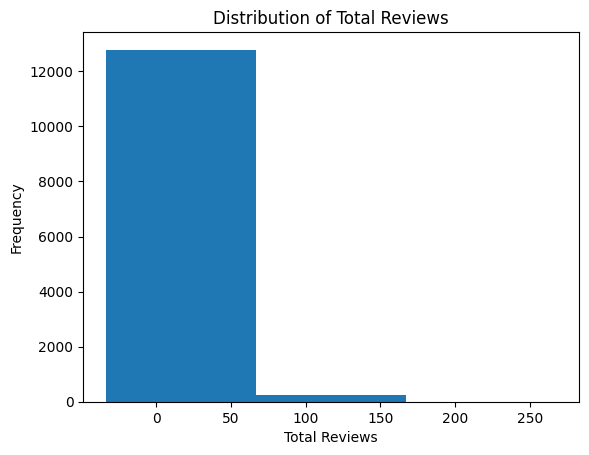

In [16]:
plt.pyplot.hist(listings_df["total_reviews"], bins = 3)

plt.pyplot.xlabel("Total Reviews")
plt.pyplot.ylabel("Frequency")
plt.pyplot.title("Distribution of Total Reviews")

Text(0.5, 1.0, 'Distribution of First message in characters')

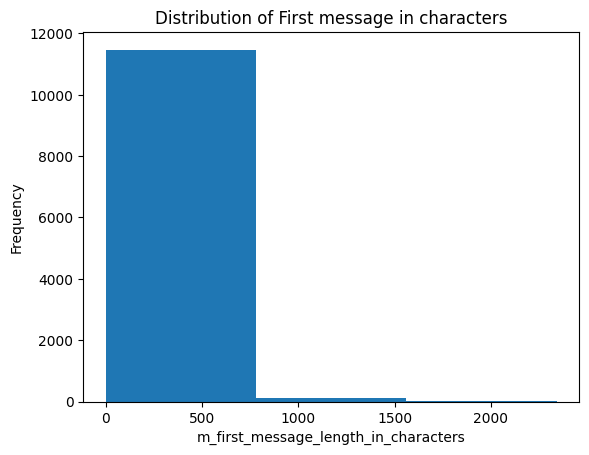

In [14]:
plt.pyplot.hist(contacts_df["m_first_message_length_in_characters"], bins=3)

plt.pyplot.xlabel("m_first_message_length_in_characters")
plt.pyplot.ylabel("Frequency")
plt.pyplot.title("Distribution of First message in characters")

In [19]:
contacts_df.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first', 'm_guests',
       'm_interactions', 'm_first_message_length_in_characters',
       'contact_channel_first', 'guest_user_stage_first'],
      dtype='object')

In [22]:
dummy_variable_1 = pd.get_dummies(contacts_df["contact_channel_first"])
dummy_variable_1.head()

,book_it,contact_me,instant_book
0,True,False,False
1,False,False,True
2,False,False,True
3,False,False,True
4,True,False,False


In [ ]:
dummy_variable_1.rename(columns={''})